# Estudio de dos casos con resultados diferentes en agrupamiento jerárquico
 

## Caso 1: Las semillas de grano.
Se dispone de un dataset en formato csv denominado **'seeds_labeled.csv'** que almacena 7 características morfológicas (longitud, grosor, peso,...)  de 3 variedades diferentes del grano de un cereal (trigo).

Visualizar los datos es una gran ventaja para poder intuir la estructura del dataset. Como generalmente los datos tienen muchas características, se puede recurrir a la PCA para reducirlos  a un espacio de dos dimensiones. Vamos, pues, a utilizar primero una PCA (tecnica de reducción de dimensionalidad) para visualizar en dos dimensiones los datos y tener claro alguna caracteristica del mismo (como se distribuye la varianza).
Posteriormente aplicaremos un agrupamiento jerárquico al dataset para ver los resultados del agrupamiento con diferentes 'linkages'.

Primero vamos a cargar en un DataFrame los datos, los vamos a extraer del mismo como una matriz y los vamos a preprocesar normalizando por características, ya que algunas de ellas tienen valores en millares y otras caracteristicas tienen valores en décimas.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Imports necesarios para el agrupamiento jerarquico
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import sys
import pandas as pd

# Import PCA
from sklearn.decomposition import PCA

from sklearn import preprocessing


data = pd.read_csv("seeds_labeled.csv")
print(data.head())
data_raw = data[['Feat1','Feat2','Feat3','Feat4','Feat5','Feat6','Feat7']]

#Obtenemos tambien las etiquetas para analizar luego mejor el dendrograa

labels = data[['Sol']]

seed_labels=labels.to_numpy()

seed_labels = seed_labels.flatten()

grains = data_raw.to_numpy()



#Preprocesado
min_max_scaler = preprocessing.MinMaxScaler()
grains_minmax = min_max_scaler.fit_transform(grains)

   Feat1  Feat2     Feat3   Feat4   Feat5   Feat6    Feat7  Sol
0  15.26  14.84  871.0000  5763.0  3312.0  2221.0     5.22    1
1  14.88  14.57    0.8811  5554.0  3333.0  1018.0  4956.00    1
2  14.29  14.09  905.0000  5291.0  3337.0  2699.0  4825.00    1
3  13.84  13.94    0.8955  5324.0  3379.0  2259.0  4805.00    1
4  16.14  14.99    0.9034  5658.0  3562.0  1355.0  5175.00    1


Vamos a crear ahora el modelo PCA y vamos a obtener los valores transformados. Las nuevas caracteristicas estan ordenadas por componentes principales. Elegiremos las dos primeras para visualizarlas en un gráfico y darnos una idea de cómo están distribuidos los datos en este espacio 2D de componentes principales.

In [69]:
# Create PCA instance: model
model = PCA()

#model_pca = decomposition.PCA(n_components=2)
pca_features = model.fit_transform(grains_minmax)  #Aplica el metodo fit_transform del modelo 

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]


Vamos a imprimir una información importante:  la tasas de varianza (%) que contiene cada componente de la PCA. Con esto podemos saber la importancia relativa (en terminos de información que contienen) de cada componente principal. Por tanto, podremos conocer si el hecho de quedarnos con las dos primeras componente (direcciones principales) nos concentra abundante información (entendida como varianza).


In [70]:

print(model.explained_variance_ratio_)
print("-----------------------------------")


[0.37667119 0.20064176 0.1412528  0.11485598 0.08633498 0.07940488
 0.0008384 ]
-----------------------------------


**Ejercicio 0: ** Explica aquí lo que significan las tasas de varianza de cada autovector de la PCA.
**Explicación:**

<font color='blue'>
Las tasas de varianza de cada autovector es la varianza explicada acumulada. Es decir, el porcentaje de varianza explicada con cada nº de componentes.
</font>
    
**Ejercicio 1: ** A raíz de los resultados de tus tasas, extrae las conclusiones tu mism@ e indícalas aquí abajo.
**conclusiones:**

<font color='blue'>
Si tomamos dos componentes (debido a que tenemos que visualizar el problema en 2D), obtenemos una varianza explicada acumulada del 57% aproximadamente. No sería lo bastante grande como para que los resultados sean fiables, ya que suele recomendar que se explique, al menos, un 80% de la varianza.
</font>


Vamos a visualizar las dos primeras componentes princiapes de los datos

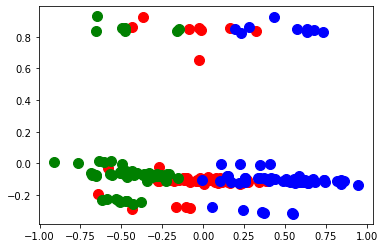

In [71]:
# Scatter plot xs vs ys
cdict = {1: 'red', 2: 'blue', 3: 'green'}

#plt.scatter(xs, ys)
#plt.axis('equal')
fig, ax = plt.subplots()
for g in np.unique(seed_labels):
    ix = np.where(seed_labels == g)
    ax.scatter(xs[ix], ys[ix], c = cdict[g], label = g, s=100)


plt.show()

**Ejercicio 2:** Indica si los resultados visuales te dicen algo acerca de la estructura que pueda poseer el dataset.
**Explicación:**

<font color='blue'>
Lo que nos está indicando el gráfico, es que puede haber 3 tipos de grano.
</font>

Vamos a realizar ahora el agrupamiento jerárquico. Igual que en ejercicios anteriores deberás probarlo para todas las distancias de clusters ('Linkage') y quedarte con el que mejor agrupa. Utiliza como referencia el coeficiente cofenético. Recuerda que hay **tres** clases de granos en realidad.

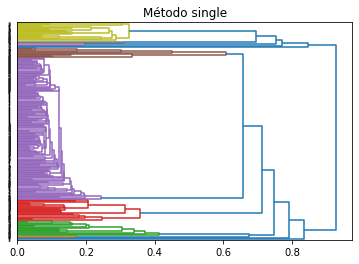

Coeficiente cofenético:  0.5652815313686366


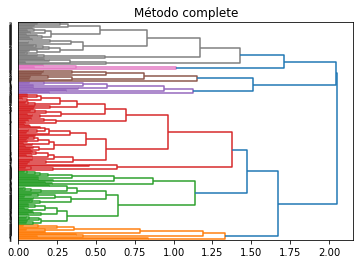

Coeficiente cofenético:  0.3239384462065189


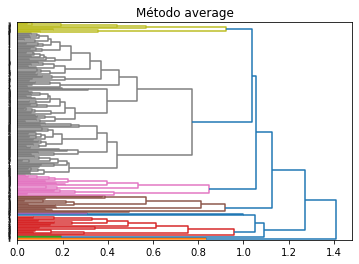

Coeficiente cofenético:  0.5707128083482527


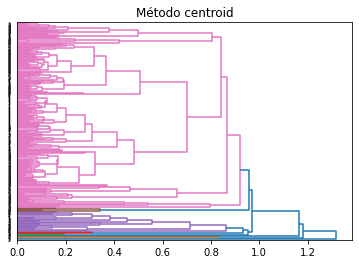

Coeficiente cofenético:  0.5577581432325152


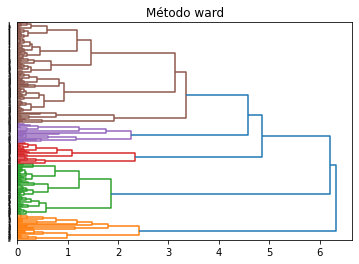

Coeficiente cofenético:  0.3151133433660545


In [74]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn import cluster
import matplotlib.pyplot as plt

metodos = ['single', 'complete', 'average', 'centroid', 'ward']

for metodo in metodos:
    #calcula con 'linkage' el agrupamiento
    Z = hierarchy.linkage(grains_minmax, metodo)
    #obten el dendrograma
    dn = hierarchy.dendrogram(Z,labels=seed_labels.tolist(),orientation='right')
    #plotealo con plt.show()
    plt.title(str('Método ' + metodo))
    plt.show()

    #obtén el coeficiente cofenético
    c,cophe_dists= hierarchy.cophenet(Z,pdist(data))
    print("Coeficiente cofenético: ", c)

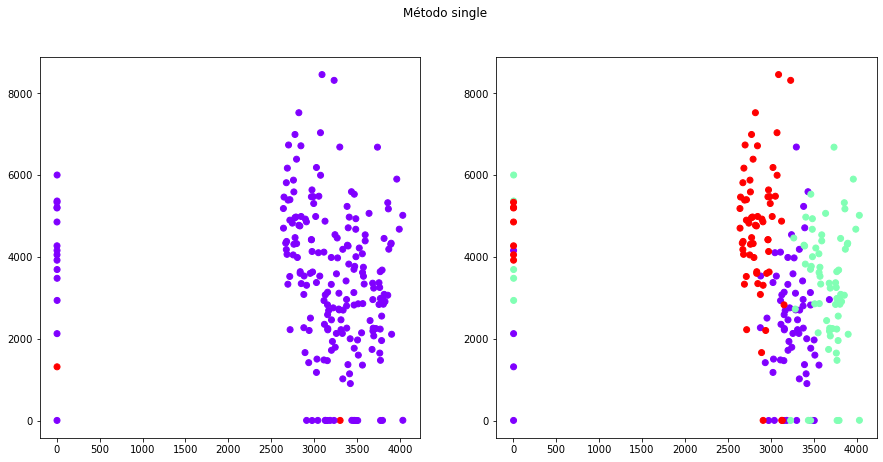

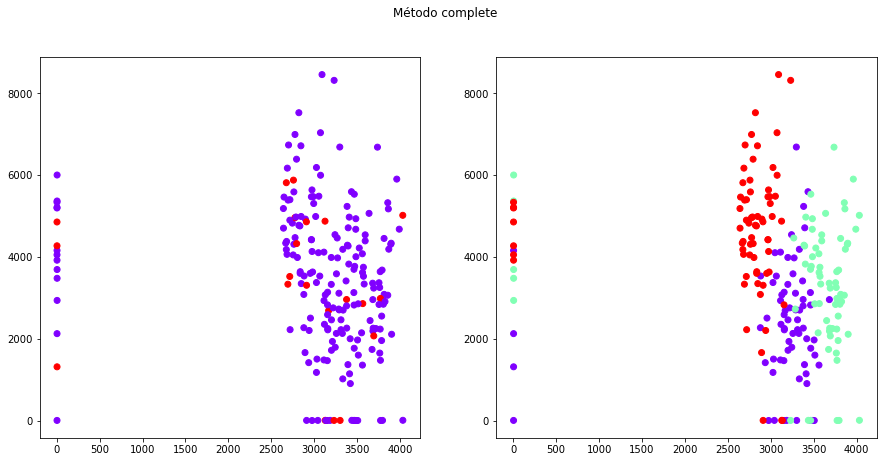

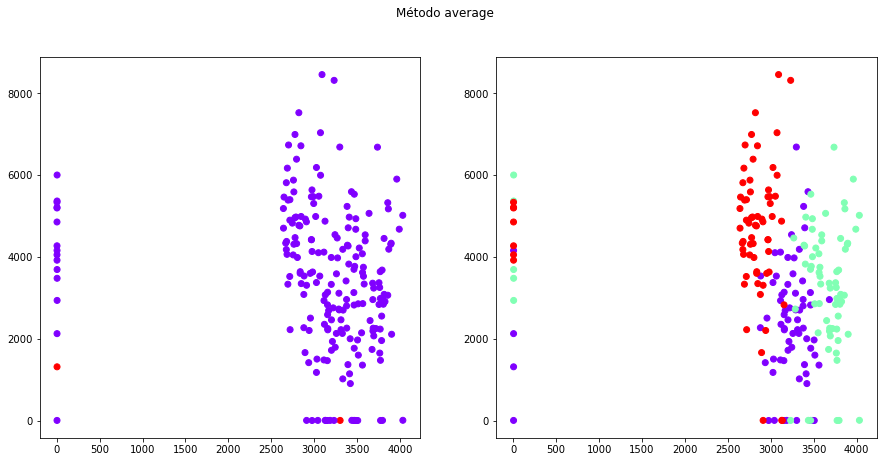

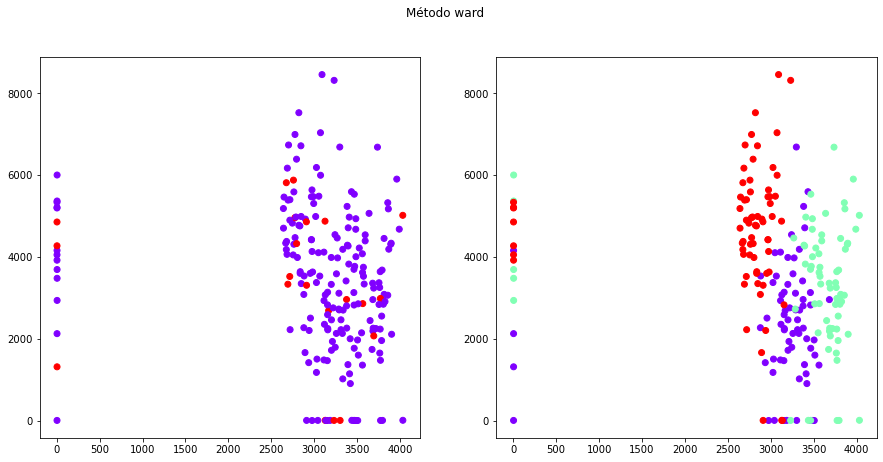

In [76]:
# Comparamos el agrupamiento con el ground truth

metodos = ['single', 'complete', 'average', 'ward']

for metodo in metodos:
    clustering = cluster.AgglomerativeClustering(n_clusters = 2, linkage = metodo).fit(data_raw)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax1.scatter(data_raw['Feat5'], data_raw['Feat6'], c = clustering.labels_, cmap = 'rainbow')
    ax2.scatter(data_raw['Feat5'], data_raw['Feat6'], c = seed_labels, cmap = 'rainbow')
    fig.suptitle(str('Método ' + metodo))

**Ejercicio 3:**  Escribid aquí un breve informe (pero lo más exhaustivo que podáis) acerca de los resultados que habéis obtenido.

<font color='blue'>
A la vista de los resultados obtenidos, encontramos una similitud entre el agrupamiento dado por Single Link y Average y el dado por Ward y Complete. En general, niguno de los cuatro modelos de agrupamiento nos proporciona buenos resultados de clustering. El método del centoride, no podemos compararlo mediante un plot, ya que la función AgglomerativeClustering solo permite como argumentos el resto de métodos. Sin embargo, con este método se suelen dar crossovers, cosa que no es deseable.

Por tanto, si tuviéramos que escoger algún método, serían Complete o Ward porque el tamaño de los grupos, aunque no es el indicado, se puede llegar a intuir por dónde se distribuyen los grupos.
<font/>

## Caso 2: Las variedades de vino.
Disponemos de un dataset llamado **'wine.csv'** de 179 muestras con caracteristicas fisico-quimicas de tres variedades de vino (*Barolo, Grignolino y Barbera*). En total se miden 13 características entre las que se encuentran el volumen de alcohol, el ácido málico, la concentración de magnesio, la intensidad del color, el tono del color, entre otras. 
Igual que en el caso anteriior es necesario normalizar por características ya que los rangos de valores de algunas son bastante distintos.

**Ejercicio 4: ** Realiza ahora tú mism@, siguiendo los pasos del ejercicio anterior, tanto el analisis PCA (extrayendo otra vez conclusiones) y el agrupamiento jerárquico con cada una de los 'Linkages'. Sigue en este mismo Notebook y coloca las cajas de código y las explicaciones que consideres pertienentes a partir de aquí.

In [52]:
data = pd.read_csv("wine.csv")
data = data.drop(columns=['class_name'])
data_raw = data.drop(columns=['class_label'])

#Obtenemos tambien las etiquetas para analizar luego mejor el dendrograa

labels = data[['class_label']]

wine_labels=labels.to_numpy()

wine_labels = wine_labels.flatten()

wines = data_raw.to_numpy()



#Preprocesado
min_max_scaler = preprocessing.MinMaxScaler()
wines_minmax = min_max_scaler.fit_transform(wines)

In [53]:
# Create PCA instance: model
model = PCA()

#model_pca = decomposition.PCA(n_components=2)
pca_features = model.fit_transform(wines_minmax)  #Aplica el metodo fit_transform del modelo 

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

In [54]:
print(model.explained_variance_ratio_)
print("-----------------------------------")

[0.40749485 0.18970352 0.08561671 0.07426678 0.05565301 0.04658837
 0.03663929 0.02408789 0.02274371 0.02250965 0.01381292 0.01273236
 0.00815095]
-----------------------------------


<font color='blue'>
Si tomamos dos componentes (debido a que tenemos que visualizar el problema en 2D), obtenemos una varianza explicada acumulada del 58% aproximadamente. No sería lo bastante grande como para que los resultados sean fiables, ya que suele recomendar que se explique, al menos, un 80% de la varianza.
</font>

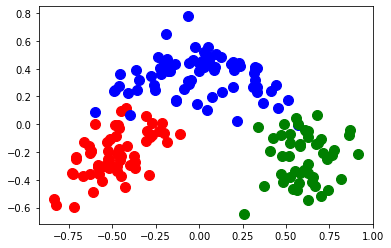

In [56]:
# Scatter plot xs vs ys
cdict = {1: 'red', 2: 'blue', 3: 'green'}

#plt.scatter(xs, ys)
#plt.axis('equal')
fig, ax = plt.subplots()
for g in np.unique(wine_labels):
    ix = np.where(wine_labels == g)
    ax.scatter(xs[ix], ys[ix], c = cdict[g], label = g, s=100)


plt.show()

<font color='blue'>
En el gráfico se pueden observar 3 grupos diferenciados de vinos.
</font>

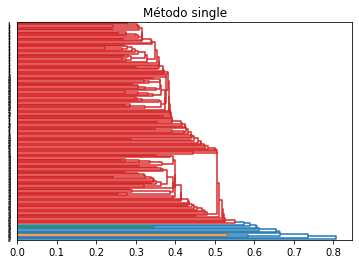

Coeficiente cofenético:  -0.048149357507644125


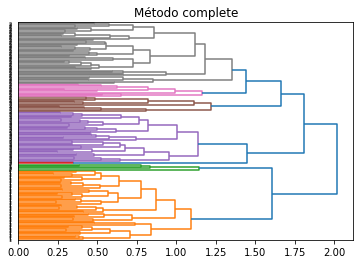

Coeficiente cofenético:  0.4536004627049124


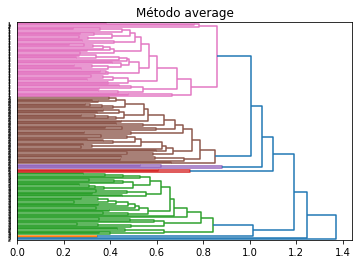

Coeficiente cofenético:  0.22193105733958146


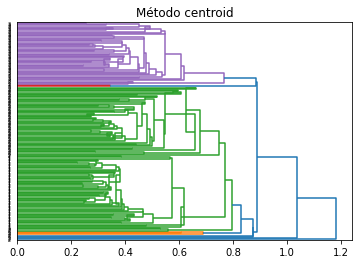

Coeficiente cofenético:  0.23145789287402718


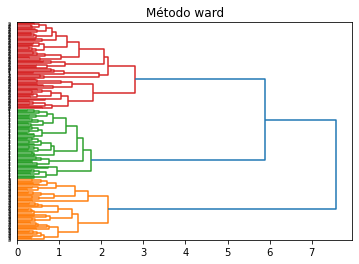

Coeficiente cofenético:  0.2942921368299833


In [61]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn import cluster
import matplotlib.pyplot as plt

metodos = ['single', 'complete', 'average', 'centroid', 'ward']

for metodo in metodos:
    #calcula con 'linkage' el agrupamiento
    Z = hierarchy.linkage(wines_minmax, metodo)
    #obten el dendrograma
    dn = hierarchy.dendrogram(Z,labels=wine_labels.tolist(),orientation='right')
    #plotealo con plt.show()
    plt.title(str('Método ' + metodo))
    plt.show()

    #obtén el coeficiente cofenético
    c,cophe_dists= hierarchy.cophenet(Z,pdist(data))
    print("Coeficiente cofenético: ", c)

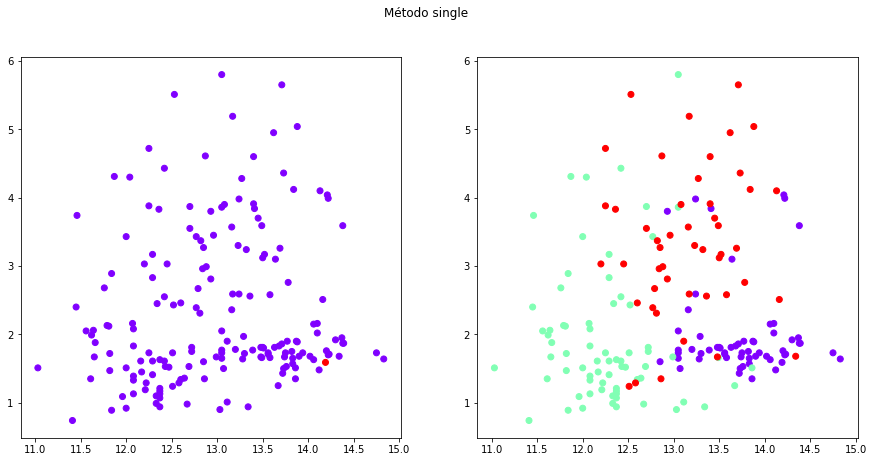

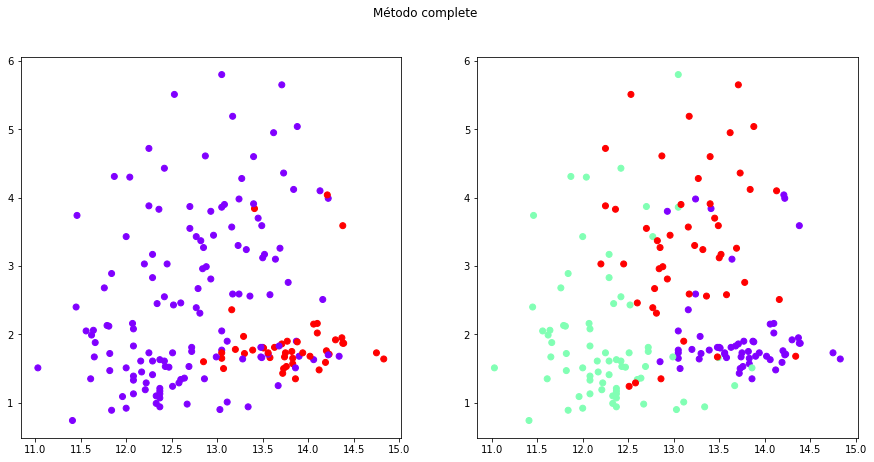

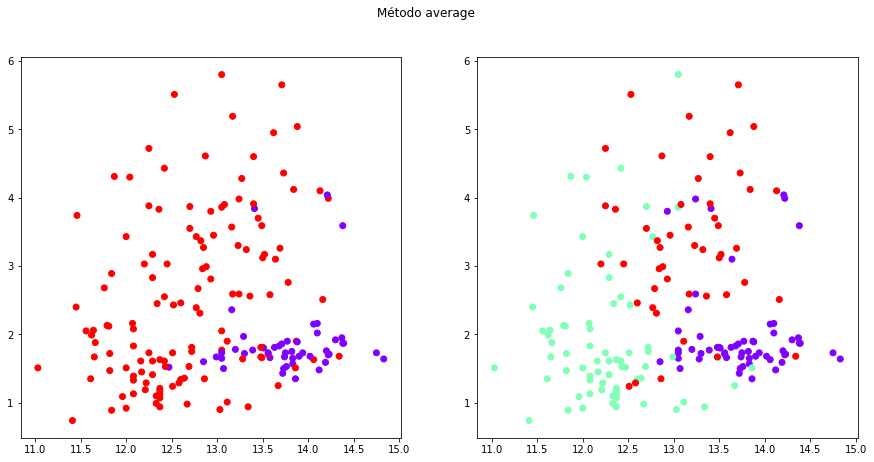

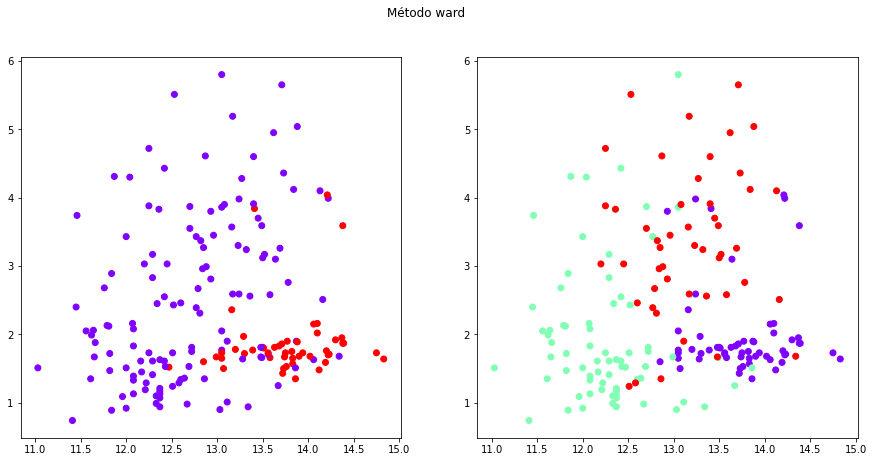

In [66]:
# Comparamos el agrupamiento con el ground truth

metodos = ['single', 'complete', 'average', 'ward']

for metodo in metodos:
    clustering = cluster.AgglomerativeClustering(n_clusters = 2, linkage = metodo).fit(data_raw)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax1.scatter(data_raw['alcohol'], data_raw['malic_acid'], c = clustering.labels_, cmap = 'rainbow')
    ax2.scatter(data_raw['alcohol'], data_raw['malic_acid'], c = wine_labels, cmap = 'rainbow')
    fig.suptitle(str('Método ' + metodo))

**Ejercicio 5: ** Escribe en una caja final un informe con tus conclusiones sobre los análisis que has hecho con este dataset. Extiéndete lo que creas conveniente (trata de ser profesional). Responde entre otras cosas a estas cuestiones:
¿Has encontrado diferencias cualitativas en los resultados de los dos datasets (semillas y vinos)? (Por ejemplo, ¿alguno de los dos es mejor separable?, ¿El análisis PCA previo te indicaba esto?

**Informe final del análisis de los vinos:**

<font color='blue'>
A la vista de los resultados obtenidos, encontramos una similitud entre el agrupamiento dado por los métodos Complete, Average y Ward; el método Single Link es el que peores resultados proporciona; y el método del centoride, no podemos compararlo mediante un plot, ya que la función AgglomerativeClustering solo permite como argumentos el resto de métodos. Sin embargo, con este método se suelen dar crossovers, cosa que no es deseable.

Cabe destacar que el coeficiente cofenético no es muy alto en ninguno de los casos, es decir, que la calidad del proceso de formación de los endogramas no es muy alta. Aunque si observamos estos, se ve claramente que el método que mejores resultados proporciona es el de Ward, ya que distingue 3 grupos claramente.
    
Por último, si comparamos los resultados de los datasets de semillas y el de vinos, se aprecia que este último es mejor separable. Esto ya nos lo indicaba el análisis PCA previo.
<font/>